In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
training_data=pd.read_csv('/content/drive/MyDrive/mitbih_train.csv',header=None)
testing_data=pd.read_csv('/content/drive/MyDrive/mitbih_test.csv',header=None)

In [3]:
# Displaying first 5 rows of the dataset
training_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Changing the values to integer and counting the values
training_data[187]=training_data[187].astype(int)
df=training_data[187].value_counts()
print(df)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [5]:
#Dsipalying the summary of training_data
training_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [6]:
# Renaming the column name
training_data.columns = [str(i) for i in range(187)] + ['Class']

In [7]:
# Summary statistics
summary_stats = training_data.describe()
summary_stats

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Class
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


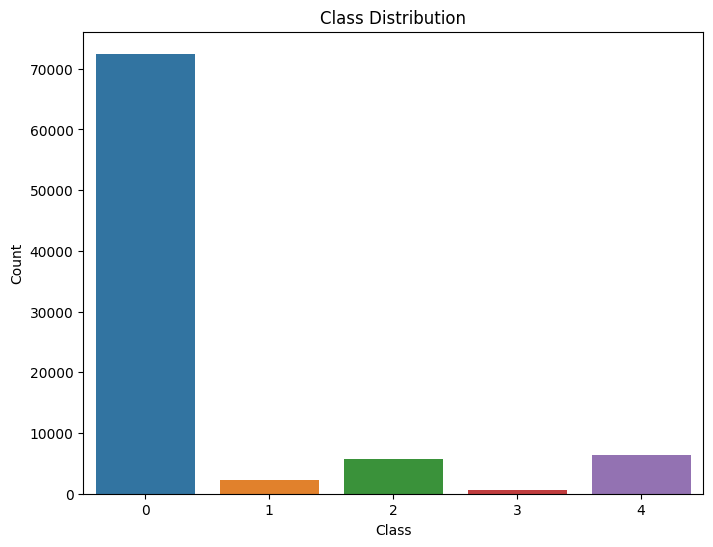

In [8]:
# Creating count plot to visualize data
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=training_data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
print("Training data Info:")
print(training_data.info())
print("\nTest Data Info:")
print(testing_data.info())

Training data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB
None


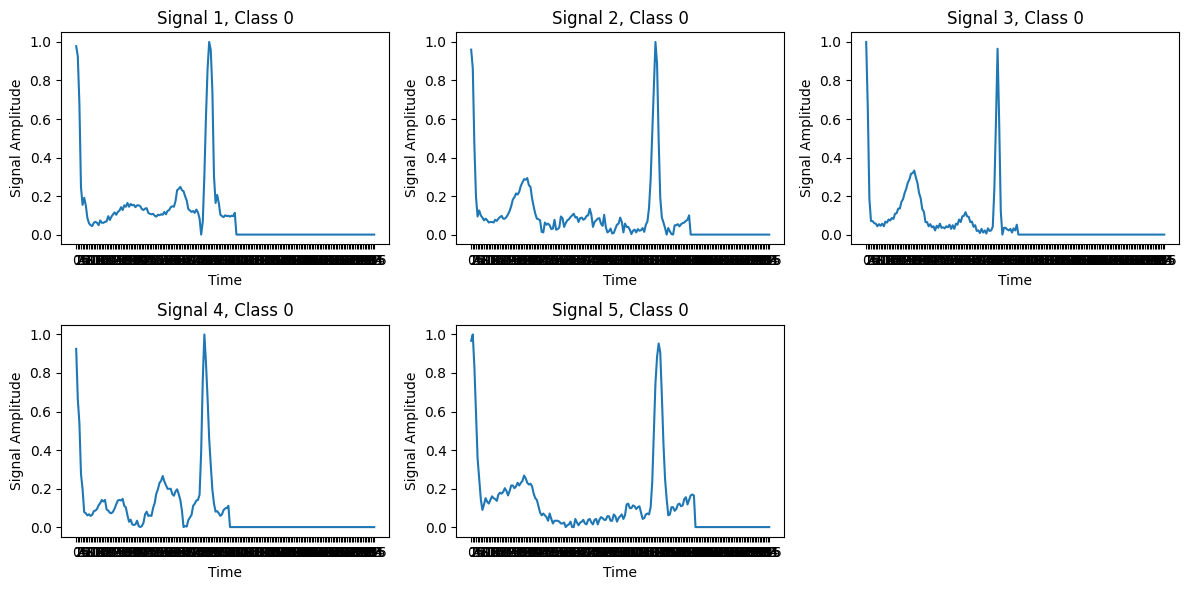

In [9]:
# Visualizing the first few ECG signals
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.plot(training_data.iloc[i, :-1])
    plt.title(f'Signal {i+1}, Class {training_data.iloc[i, -1]}')
    plt.xlabel('Time')
    plt.ylabel('Signal Amplitude')
plt.tight_layout()
plt.show()

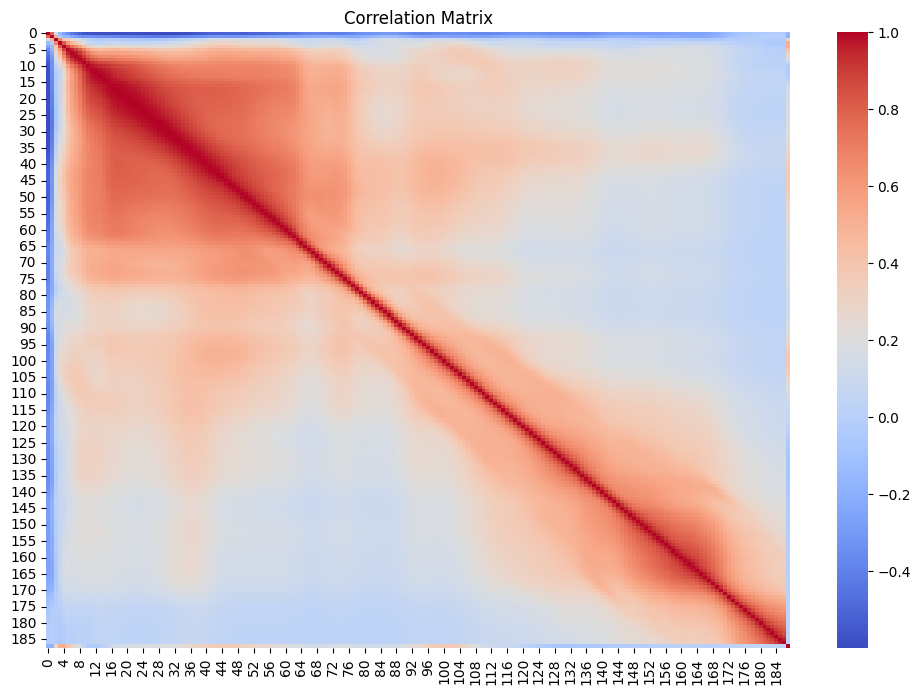

In [10]:
# Correlation matrix for training dataset
correlation_matrix = training_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

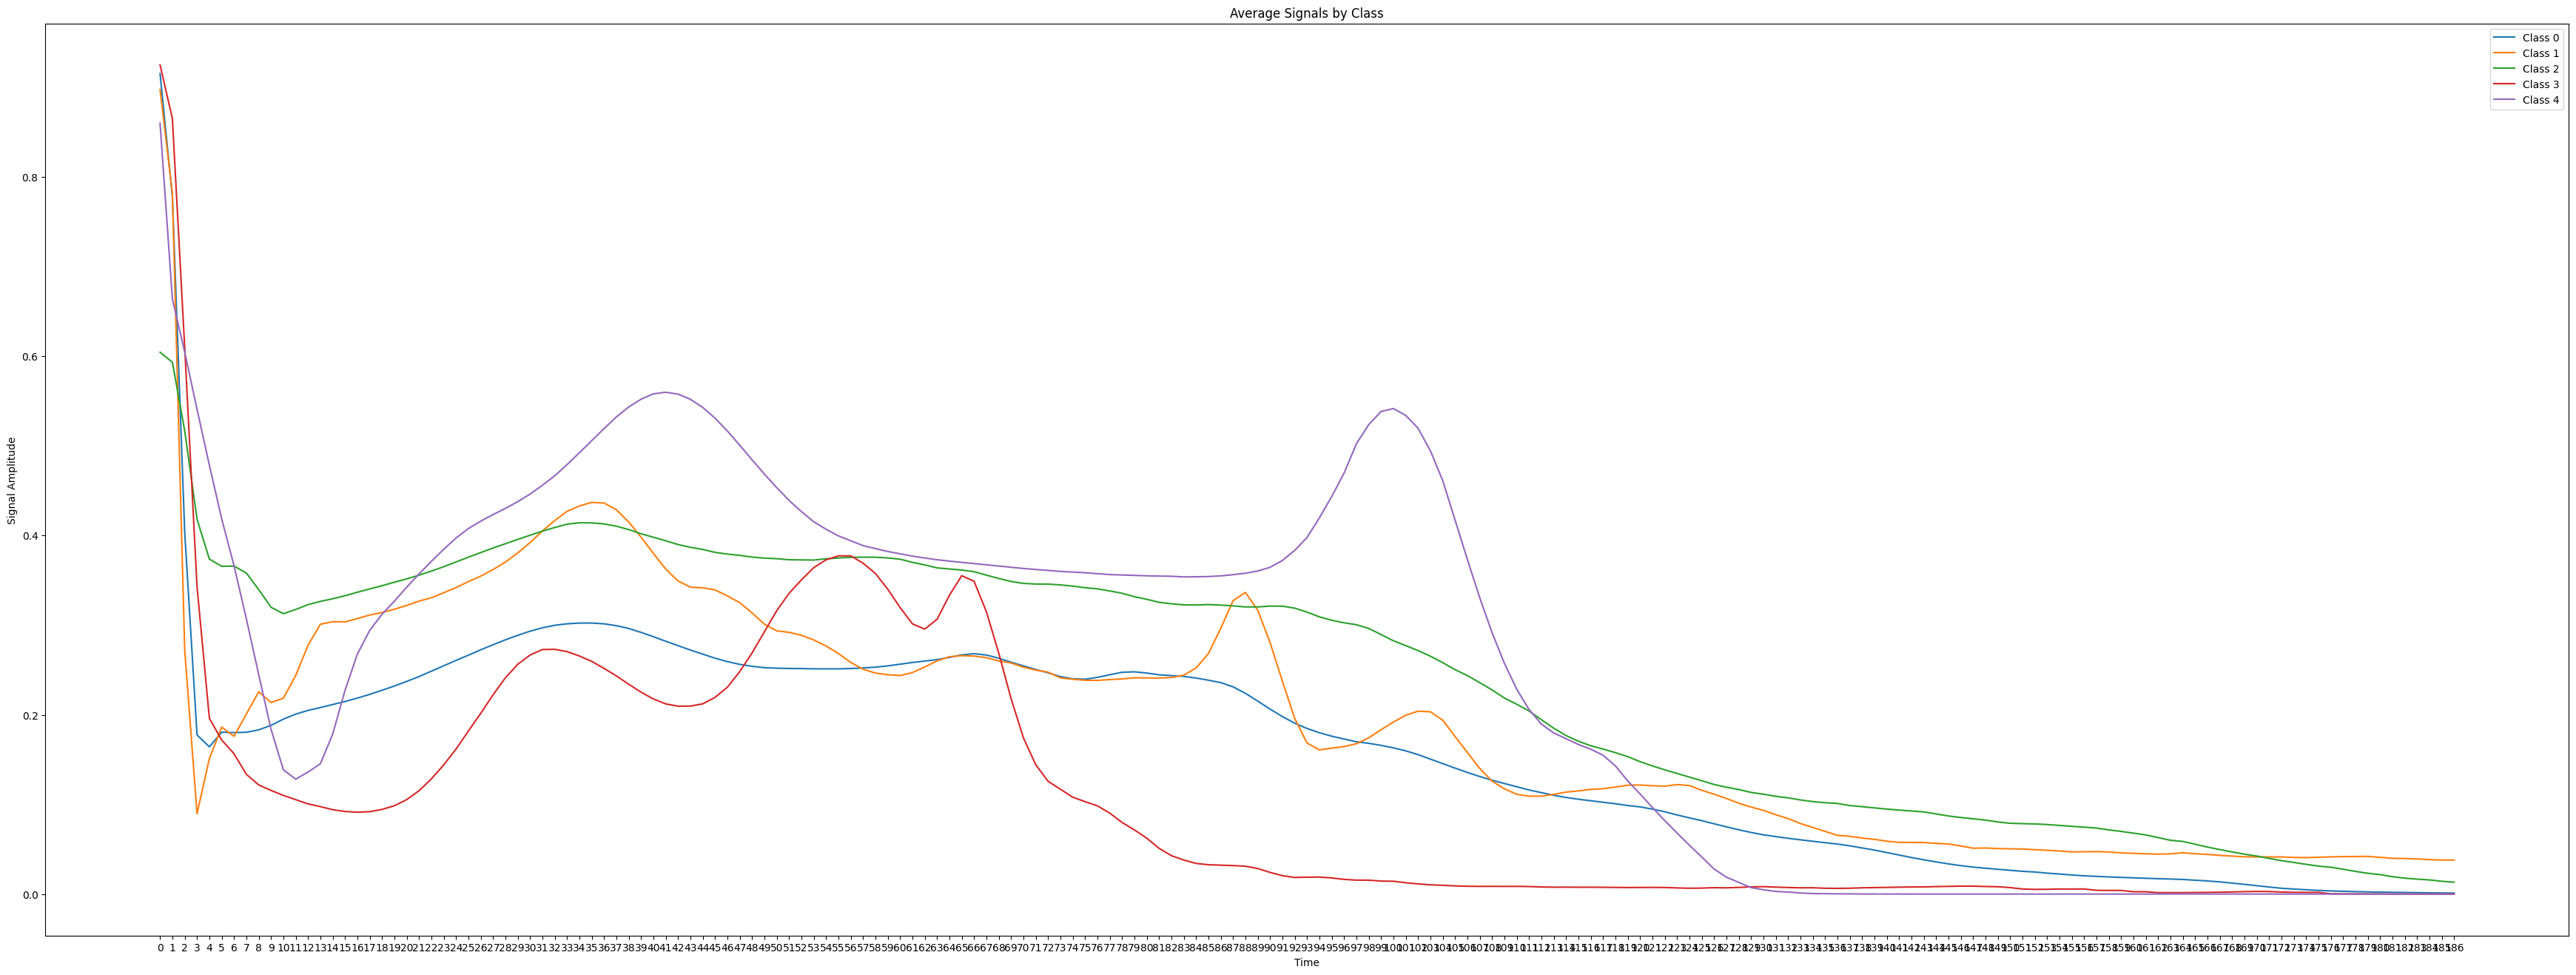

In [11]:
# Signal Averages by Class
plt.figure(figsize=(44, 16))
for class_label in sorted(training_data['Class'].unique()):
    class_data = training_data[training_data['Class'] == class_label].iloc[:, :-1].mean()
    plt.plot(class_data, label=f'Class {class_label}')
plt.title('Average Signals by Class')
plt.xlabel('Time')
plt.ylabel('Signal Amplitude')
plt.legend()
plt.show()

<ipython-input-12-bbd7708d8bfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class_data, label=f'Class {class_label}', shade=True)
<ipython-input-12-bbd7708d8bfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class_data, label=f'Class {class_label}', shade=True)
<ipython-input-12-bbd7708d8bfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class_data, label=f'Class {class_label}', shade=True)
<ipython-input-12-bbd7708d8bfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class_data, label=

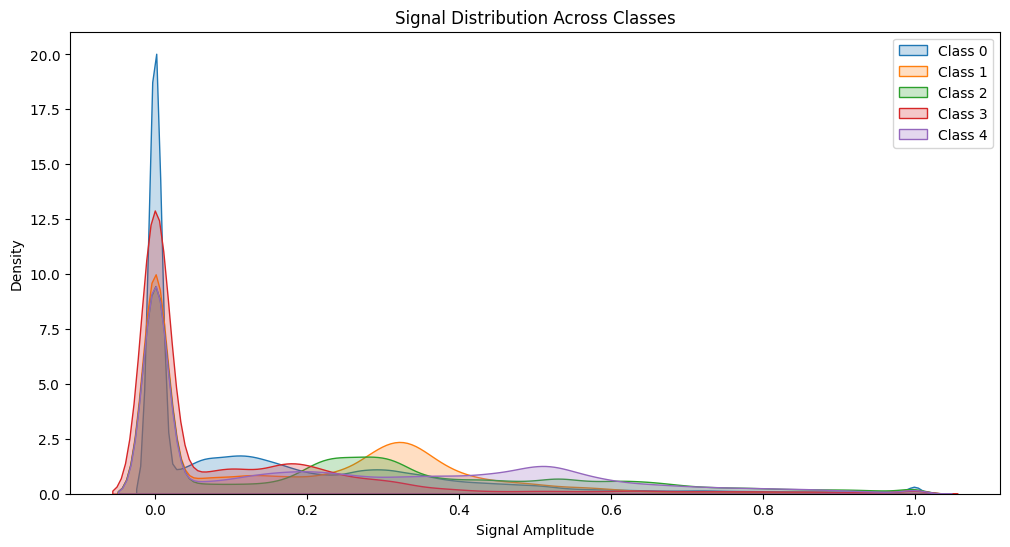

In [12]:
#Signal Distribution Across Classes
plt.figure(figsize=(12, 6))
for class_label in sorted(training_data['Class'].unique()):
    class_data = training_data[training_data['Class'] == class_label].iloc[:, :-1].values.flatten()
    sns.kdeplot(class_data, label=f'Class {class_label}', shade=True)
plt.title('Signal Distribution Across Classes')
plt.xlabel('Signal Amplitude')
plt.ylabel('Density')
plt.legend()
plt.show()

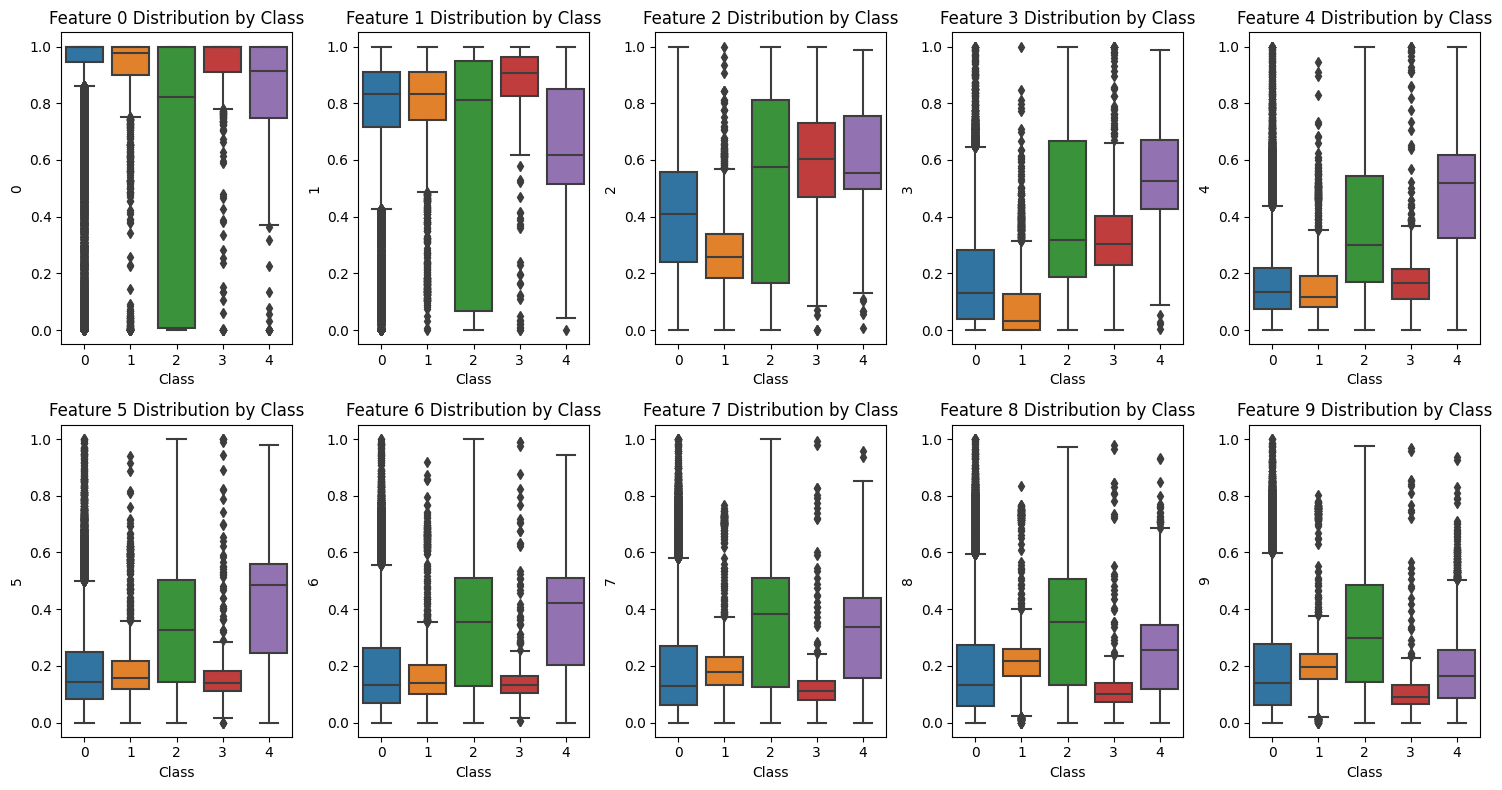

In [13]:
# Visualizing the distribution of each features
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sns.boxplot(x='Class', y=str(i), data=training_data)
    plt.title(f'Feature {i} Distribution by Class')
plt.tight_layout()
plt.show()


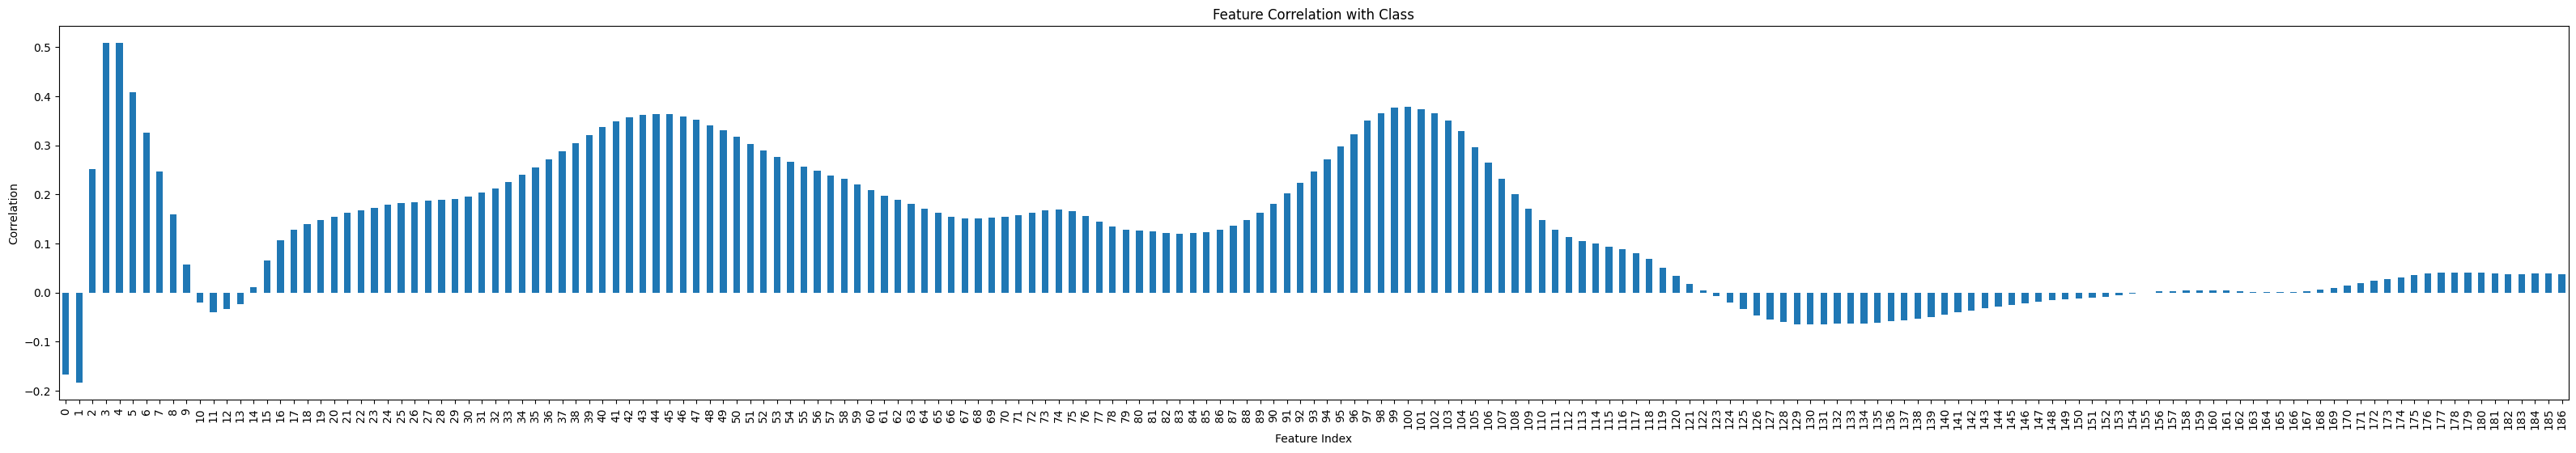

In [14]:
# Visualizing Correlation between each Index
feature_correlation = training_data.iloc[:, :-1].corrwith(training_data['Class'])
feature_correlation.plot(kind='bar', figsize=(40, 6))
plt.title('Feature Correlation with Class')
plt.xlabel('Feature Index')
plt.ylabel('Correlation')
plt.show()


In [15]:
# Preprocessing the dataset
from sklearn.impute import SimpleImputer
X_train = training_data.iloc[:, :-1].values
y_train = training_data.iloc[:, -1].values

X_test = testing_data.iloc[:, :-1].values
y_test = testing_data.iloc[:, -1].values

#Handling the missing Values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [17]:
# Preprocessing the training and testing dataset
# Importing the sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Loading dataset
X_train = training_data.iloc[:, :-1].values
y_train = training_data.iloc[:, -1].values

X_test = testing_data.iloc[:, :-1].values
y_test = testing_data.iloc[:, -1].values

# Creating transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Separate numeric and categorical features
numeric_features = list(range(X_train.shape[1]))
categorical_features = []

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# preprocessing the train and test dataset
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Feature selection using KBest
from sklearn.feature_selection import SelectKBest, f_classif
k_best = 15
selector = SelectKBest(f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
# Print the selected feature indices
selected_feature_indices = selector.get_support(indices=True)
print(f'Selected feature indices: {selected_feature_indices}')

Selected feature indices: [  3   4   5  42  43  44  45  46  97  98  99 100 101 102 103]


In [ ]:
model = RandomForestClassifier()
model.fit(X_train_selected, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test_selected)

Accuracy: 95.21%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     18118
         1.0       0.94      0.50      0.65       556
         2.0       0.94      0.73      0.82      1448
         3.0       0.76      0.29      0.42       162
         4.0       0.97      0.89      0.93      1608

    accuracy                           0.95     21892
   macro avg       0.91      0.68      0.76     21892
weighted avg       0.95      0.95      0.95     21892

Confusion Matrix:


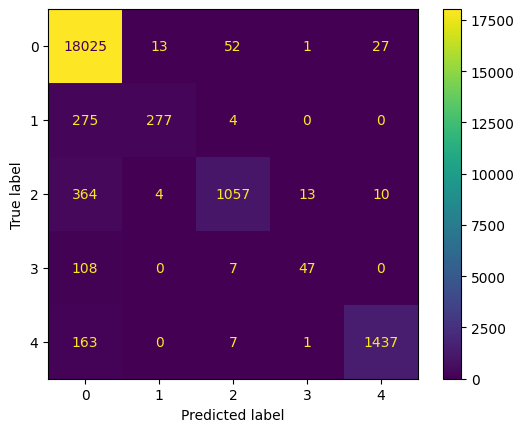

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")


In [ ]:
#Develop supervised or unsupervised Machine Learning algorithms and compare their performances.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
X_train = training_data.iloc[:, :-1].values
y_train = training_data.iloc[:, -1].values

X_test = testing_data.iloc[:, :-1].values
y_test = testing_data.iloc[:, -1].values

In [ ]:
# Supervised Learning Techniques
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

performances_supervised = {}

for clf_name, clf in classifiers.items():
    param_grid = param_grids.get(clf_name, {})

    # Create RandomizedSearchCV with parallel processing
    randomized_search = RandomizedSearchCV(
        clf, param_grid, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42
    )

    randomized_search.fit(X_train, y_train)

    best_clf = randomized_search.best_estimator_

    y_pred = best_clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)

    performances_supervised[clf_name] = {
        'Best Parameters': randomized_search.best_params_,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': confusion
    }

    print(f'{clf_name} Performance:')
    print(f'Best Parameters: {randomized_search.best_params_}')
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'Confusion Matrix:\n{confusion}\n')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest Performance:
Best Parameters: {}
Accuracy: 0.9746939521286314
F1 Score: 0.9730721136092898
Precision: 0.9748012566218289
Recall: 0.9746939521286314
Confusion Matrix:
[[18104     4     8     0     2]
 [  216   338     1     0     1]
 [  154     0  1275    14     5]
 [   47     0    12   103     0]
 [   88     0     2     0  1518]]



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


K-Nearest Neighbors Performance:
Best Parameters: {}
Accuracy: 0.9736433400328888
F1 Score: 0.9724937005444436
Precision: 0.9727456417070396
Recall: 0.9736433400328888
Confusion Matrix:
[[18021    38    45     9     5]
 [  186   357    13     0     0]
 [  113     3  1305    23     4]
 [   43     0    16   103     0]
 [   69     0    10     0  1529]]



In [ ]:
# Unsupervised Learning (KMeans Clustering)
n_clusters = len(np.unique(y_train))
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  # Explicitly set n_init
X_train_clusters = kmeans.fit_predict(X_train)
X_test_clusters = kmeans.predict(X_test)

In [ ]:
silhouette_score_unsupervised = silhouette_score(X_test, X_test_clusters)
print(f'Unsupervised Learning Silhouette Score: {silhouette_score_unsupervised}')

Unsupervised Learning Silhouette Score: 0.17735281911744366


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = classifier.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))

print (classification_report(y_test, y_pred))

Accuracy test set:  0.9680248492600037
None
Precision test set:  0.9680248492600037
None
Recall test set:  0.9680248492600037
None
F-score test set:  0.9680248492600037
None
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.96      0.56      0.71       556
         2.0       0.97      0.86      0.91      1448
         3.0       0.75      0.48      0.59       162
         4.0       1.00      0.91      0.95      1608

    accuracy                           0.97     21892
   macro avg       0.93      0.76      0.83     21892
weighted avg       0.97      0.97      0.97     21892



In [ ]:
train_data_predictions = classifier.predict(X_train)

print (print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions)))
print (print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' )))
print (print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' )))
print (print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' )))

print (classification_report(y_train, train_data_predictions))

Accuracy train set:  0.9713776640701738
None
Precision train set:  0.9713776640701738
None
Recall train set:  0.9713776640701738
None
F-score train set:  0.9713776640701738
None
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     72471
         1.0       0.96      0.62      0.75      2223
         2.0       0.97      0.88      0.92      5788
         3.0       0.86      0.47      0.61       641
         4.0       1.00      0.93      0.96      6431

    accuracy                           0.97     87554
   macro avg       0.95      0.78      0.85     87554
weighted avg       0.97      0.97      0.97     87554



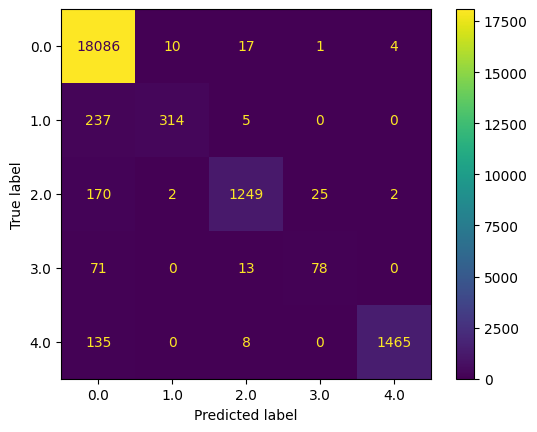

In [ ]:
# Plot the confusion matrix
con_m = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=con_m, display_labels=classifier.classes_)
disp.plot()

In [19]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
# XGBoost Model
classifiers = {
    'XGBoost': XGBClassifier(random_state=42)
}

In [21]:
# Train, predict, and evaluate XGBoost model
performances_supervised = {}
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)

    performances_supervised[clf_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': confusion
    }

    print(f'{clf_name} Performance:')
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'Confusion Matrix:\n{confusion}\n')

XGBoost Performance:
Accuracy: 0.9808149095560021
F1 Score: 0.9799150231321195
Precision: 0.9803686341801029
Recall: 0.9808149095560021
Confusion Matrix:
[[18074    21    16     1     6]
 [  169   380     6     0     1]
 [   88     2  1338    15     5]
 [   33     0    13   116     0]
 [   40     1     3     0  1564]]

